In [1]:
#Importamos Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
#Importamos los datos
df = pd.read_csv("scalers.csv")[["time", "rateCorr"]]
df["time"] = pd.to_datetime(df["time"], unit = "s")
df = df.set_index("time")

In [5]:
#Definimos las funciones para graficar

def plot(x, y, c = "orangered", a = 0.8, l = 0.5, lab = "", size = (15, 5), formater = '%Y-%m-%d'):
    #ax = plt.figure(figsize = (15, 5))

    plt.plot(x, y, color = c, alpha = a, linewidth = l, label = lab)
    plt.xticks(ax.xaxis.set_major_formatter(mdates.DateFormatter(formater)))
    
def scatter(x, y, c = "k", m = "x", msize= 1 , lab = "", size = (15, 5), formater = '%Y-%m-%d'):
    plt.plot(x, y, c, marker = m,markeredgewidth = msize, linestyle = "", label = lab)
    plt.xticks(ax.xaxis.set_major_formatter(mdates.DateFormatter(formater)))
    
def formato(x = None, y= "counts [$m^2 / s$]"):
    plt.xlabel(x)
    plt.ylabel(y, size = 13)
    plt.grid(linestyle=':', linewidth=1.5)



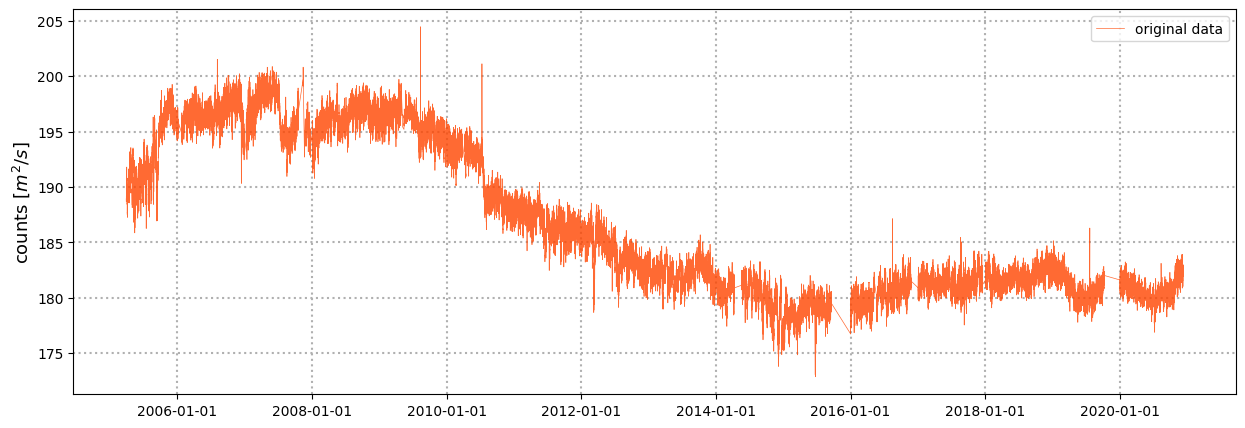

In [8]:
fig, ax = plt.subplots(figsize = (15,5))

plot(df.index, df["rateCorr"], lab = "original data")
formato()
plt.legend()

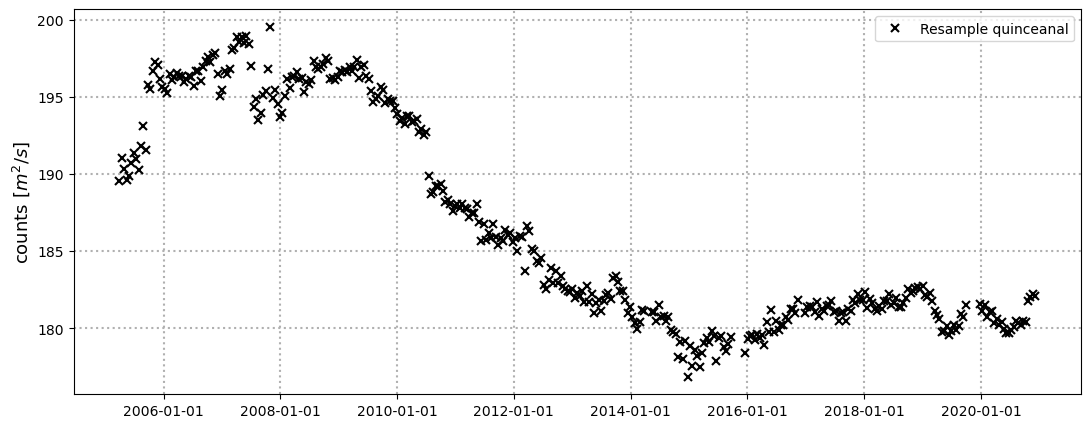

In [5]:
#Resample en quinceanal
fig, ax = plt.subplots(figsize = (13,5))

dfm = df.dropna().resample("15D").mean() #Ventana Horas

scatter(dfm.index, dfm["rateCorr"], lab = "Resample quinceanal", msize = 1.5) 
formato()
plt.legend()

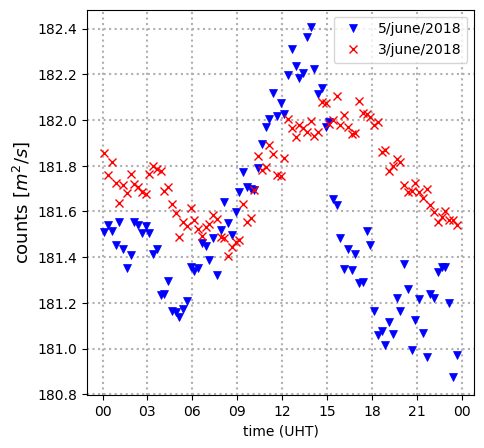

In [6]:
fig, ax = plt.subplots(figsize = (5,5))

scatter(df.loc["2/june/2018"].index, df.loc["5/june/2018"]["rateCorr"], size = (5,5), msize = 0.5,formater = "%H", m = "v", c = "b", lab = "5/june/2018")
scatter(df.loc["2/june/2018"].index, df.loc["3/june/2018"].reset_index()["rateCorr"], size = (5,5), msize = 1,formater = "%H", m = "x", c = "r", lab = "3/june/2018")


#plot(df.loc["2/june/2018"].index, june_2018.reset_index()["rateCorr"], l = 2, size = (5,5),formater = "%H", c = "k", lab = "june/2018 average")

formato("time (UHT)")
plt.legend()

